# Example: Beam focusing into a slab of crystal

To compute the waist diameter inside the crystal and find the confocal parameter (collimated range).

In [88]:
import ndispers as nd
import numpy as np
import matplotlib.pyplot as plt
from gbeampro.beambase import GaussBeam

In [89]:
# setup a GaussBeam instance
b1 = GaussBeam(wl_um=1.064, n=1.0, z_mm=0, R_mm=np.infty, w_mm=1.5)

In [90]:
b1

GaussBeam(wl_um=1.06400, n=1.000000, z_mm=0.00000, R_mm=inf, w_mm=1.50000)
  q : 0.00000e+00 -6.64341e+03i
  theta : 2.257878e-01 mrad

In [91]:
# converge by a thin lens (f=150 mm)
b1.thinlens(150)

GaussBeam(wl_um=1.06400, n=1.000000, z_mm=0.00000, R_mm=-1.50000e+02, w_mm=1.50000)
  q : -1.49924e+02 -3.38509e+00i
  theta : 2.257878e-01 mrad

In [92]:
# propagate upto crystal interface
# + 5 distance tries to bring the wasit location at the center of the crystal
b1.propagate(150 - 20*0.5 + 5)

GaussBeam(wl_um=1.06400, n=1.000000, z_mm=145.00000, R_mm=-7.25091e+00, w_mm=0.05977)
  q : -4.92357e+00 -3.38509e+00i
  theta : 5.666828e+00 mrad

In [93]:
# Air-Crystal interface
Xtal = nd.media.crystals.LBO_Newlight_xy() # crystal object
n2 = Xtal.n(1.064, 0, 149, pol='o') # refractive index of the crystal
b1.interface(n2)

GaussBeam(wl_um=1.06400, n=1.604333, z_mm=145.00000, R_mm=-1.16329e+01, w_mm=0.05977)
  q : -7.89905e+00 -5.43082e+00i
  theta : 3.532224e+00 mrad

In [94]:
# propagate inside crystal (length 20 mm)
b1.propagate(20)

GaussBeam(wl_um=1.06400, n=1.604333, z_mm=165.00000, R_mm=1.45383e+01, w_mm=0.08270)
  q : 1.21010e+01 -5.43082e+00i
  theta : 2.552784e+00 mrad

In [95]:
# Crystal-Air interface
b1.interface(1.0)

GaussBeam(wl_um=1.06400, n=1.000000, z_mm=165.00000, R_mm=9.06187e+00, w_mm=0.08270)
  q : 7.54267e+00 -3.38509e+00i
  theta : 4.095503e+00 mrad

In [96]:
# propagate in air upto a lens
# + 5 distance tries to collimate after lens 2
b1.propagate(200 - 20*0.5 + 5)

GaussBeam(wl_um=1.06400, n=1.000000, z_mm=360.00000, R_mm=2.02599e+02, w_mm=2.02623)
  q : 2.02543e+02 -3.38509e+00i
  theta : 1.671490e-01 mrad

In [97]:
# collimate by a thin lens (f=200mm)
b1.thinlens(200)

GaussBeam(wl_um=1.06400, n=1.000000, z_mm=360.00000, R_mm=-1.55891e+04, w_mm=2.02623)
  q : -5.87433e+03 -7.55432e+03i
  theta : 1.671490e-01 mrad

In [98]:
# propagate in air by distance 100 mm
b1.propagate(100)

GaussBeam(wl_um=1.06400, n=1.000000, z_mm=460.00000, R_mm=-1.56573e+04, w_mm=2.01330)
  q : -5.77433e+03 -7.55432e+03i
  theta : 1.682224e-01 mrad

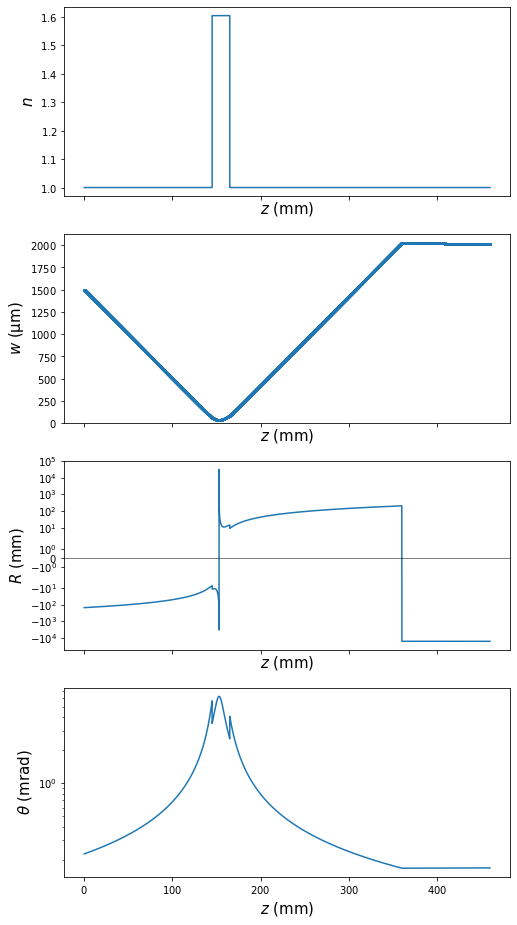

In [99]:
# plot beam trajectory
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True, figsize=(8, 16))
b1.plot_n(ax1)
b1.plot_w(ax2)
b1.plot_R(ax3)
b1.plot_theta(ax4)

In [100]:
# search beam waists
b1.search_BeamWaists()


Beam waists in z range [0.000, 460.000000] mm
--------------------------------------------------
No.0:
  Waist location, z  : 0.0000 mm
  Refractive index, n  : 1.0000
  Waist spot diamter, 2*w0 : 3000.0 µm
  Confocal parameter (2*Rayleigh range) : 13286.81 mm
  2.84 * Confocal parameter : 37734.54 mm
No.1:
  Waist location, z  : 152.9000 mm
  Refractive index, n  : 1.6043
  Waist spot diamter, 2*w0 : 67.7 µm
  Confocal parameter (2*Rayleigh range) : 10.86 mm
  2.84 * Confocal parameter : 30.85 mm
No.2:
  Waist location, z  : 360.0000 mm
  Refractive index, n  : 1.0000
  Waist spot diamter, 2*w0 : 4052.5 µm
  Confocal parameter (2*Rayleigh range) : 24244.54 mm
  2.84 * Confocal parameter : 68854.49 mm


You can see the focusing condition at the above result No.1.